# Ujian Modul 2 - Purwadhika Data Science JC Program

## Context - Taken from Kaggle
Did you know that claims can be filed against TSA? Sometimes US Terminal Security Agency (TSA) makes mistakes. People can get hurt and property can be damaged, lost, or stolen. Claims are generally filed against TSA for personal injuries and lost or damaged property during screenings and they keep records of every claim!

### Content
The dataset includes claims filed between 2002 through 2015.

1. Claim Number
1. Date Received
1. Incident Date
1. Airport Code
1. Airport Name
1. Airline Name
1. Claim Type
1. Claim Site
1. Item
1. Claim Amount
1. Status
1. Close Amount
1. Disposition

This data is coming from the Kaggle Dataset that contain the data of claim that have been filed into the TSA. We would try to explore the data and clean the data partially (we would not clean and analyze everything as it would take more time than necessary) and we would only use 25% data from the original dataset.

This exam scoring would be explained below:

- This Notebook would have total score of 80 (+ 10 Bonus POINT for Bonus Question), which consist of:
    - 40 POINT for the Question part (10 point for each question)
    - 40 POINT for the preprocessing part by following the guide
- The Dashboard Tableau would yield 20 POINT
- The Maximum Score would be still 100, Bonus Question is just a Bonus. Work it if you have an extra time and already sure about all your other answer (or not sure about the other question, and need this bonus question to help)

When you finish, upload your notebook contain all the answer AND the Tableau Dashboard Link to regitaz@gmail.com. You do not need to upload the .csv file. 

Try to read the data and show all the important info first. For starter, try to understand what each column represent.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
tsa = pd.read_csv('tsa_claims_ujian.csv')

In [3]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN


In [4]:
tsa.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses,-,-,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Books; Magazines & Other,-,-,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,-,-,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,-,-,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN


In [5]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Claim Number   51066 non-null  object
 1   Date Received  50996 non-null  object
 2   Incident Date  50496 non-null  object
 3   Airport Code   49014 non-null  object
 4   Airport Name   49014 non-null  object
 5   Airline Name   42511 non-null  object
 6   Claim Type     49106 non-null  object
 7   Claim Site     50876 non-null  object
 8   Item           50054 non-null  object
 9   Claim Amount   50074 non-null  object
 10  Status         51065 non-null  object
 11  Close Amount   33786 non-null  object
 12  Disposition    32846 non-null  object
dtypes: object(13)
memory usage: 5.1+ MB


In [6]:
tsa.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,51066,50996,50496,49014,49014,42511,49106,50876,50054,50074,51065,33786,32846
unique,51065,3522,10788,405,419,243,8,6,1854,13248,13,6009,3
top,2013121110011,27-May-04,12/22/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,182,43,2379,2286,4377,29713,39937,9183,7065,17134,17907,17147


In [7]:
tsa.columns

Index(['Claim Number', 'Date Received', 'Incident Date', 'Airport Code',
       'Airport Name', 'Airline Name', 'Claim Type', 'Claim Site', 'Item',
       'Claim Amount', 'Status', 'Close Amount', 'Disposition'],
      dtype='object')

In [11]:
tsa['Claim Number'].drop_duplicates().sample(2).values

array(['2015072023981', '2005060185586'], dtype=object)

In [14]:
tsaDesc =[]
for item in tsa.columns :
    tsaDesc.append([item,tsa[item].dtypes, tsa[item].isna().sum(), round((tsa[item].isna().sum()/len(tsa))*100,2),
                  tsa[item].nunique(),tsa[item].drop_duplicates().sample(2).values])
pd.DataFrame(tsaDesc, columns = ['dataFeatures','dataType','null','nullPct','unique','uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Claim Number,object,0,0.00,51065,"[0715204M, 2011093087264]"
1,Date Received,object,70,0.14,3522,"[28-Nov-12, 8-Mar-06]"
2,Incident Date,object,570,1.12,10788,"[12/29/2012 9:00, 5/30/2012 0:00]"
3,Airport Code,object,2052,4.02,405,"[TBN, HSV]"
4,Airport Name,object,2052,4.02,419,"[Lanai City; HI, Gainesville Regional]"
5,Airline Name,object,8555,16.75,243,"[Aero California, Air Europa]"
6,Claim Type,object,1960,3.84,8,"[Passenger Theft, -]"
7,Claim Site,object,190,0.37,6,"[-, Other]"
8,Item,object,1012,1.98,1854,"[Alcoholic beverages; Locks, Cameras - Digital..."
9,Claim Amount,object,992,1.94,13248,"[$280.52 , $186.87 ]"


In [7]:
## hasilnya 

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Claim Number,object,0,0.00,51065,"[2007052325856, 2010073174251]"
1,Date Received,object,70,0.14,3522,"[10-Apr-09, 31-Jan-11]"
2,Incident Date,object,570,1.12,10788,"[11/20/2008 0:00, 10/8/2005 0:00]"
3,Airport Code,object,2052,4.02,405,"[UNV, IND]"
4,Airport Name,object,2052,4.02,419,"[Huntsville International Airport, Santa Barba..."
5,Airline Name,object,8555,16.75,243,"[Westjet Airlines Ltd, Lan Airlines]"
6,Claim Type,object,1960,3.84,8,"[Employee Loss (MPCECA), -]"
7,Claim Site,object,190,0.37,6,"[Checkpoint, -]"
8,Item,object,1012,1.98,1854,"[Clocks - Inexpensive ($75.00 or less); Other,..."
9,Claim Amount,object,992,1.94,13248,"[$250.38 , $2;858.27 ]"


If you notice, there is '-' value that become a filler for an empty value. Replace all these '-' in every column into NaN object (np.nan) 

In [15]:
def isiNAN(x):
    if x == '-':
        return np.nan
    else :
        return x 

In [ ]:
for item in tsa.columns :
    tsa[item].apply(isiNAN)

In [16]:
for item in tsa.columns :
    tsa[item] = tsa[item].apply(lambda x : np.nan if x == '-' else x)

Try to convert the Date Received and Incident Date data type into Datetime object. For the Incident Date columns, if you directly try to convert the column into datetime object it would raise an error notice. In that case, try to show the dataframe with the Incident Date column contain all the error.  

In [21]:
tsa['Date Received'] = pd.to_datetime(tsa['Date Received'])

In [22]:
## check item/format datetime didalam kolom Incident Date yang error
incident_time = []
error_incident_time = []
for index,value in enumerate(tsa['Incident Date']):
    try :
        if pd.isna(value):
            incident_time.append(np.nan)
        else :
            incident_time.append(pd.to_datetime(value))
    except :
        incident_time.append(value)
        error_incident_time.append(index)

In [26]:
list(enumerate(tsa['Incident Date']))

[(0, '1/6/2003 0:00'),
 (1, '6/16/2002 0:00'),
 (2, '5/31/2002 0:00'),
 (3, '7/12/2002 0:00'),
 (4, '8/30/2002 0:00'),
 (5, '8/5/2002 0:00'),
 (6, '8/12/2002 0:00'),
 (7, '8/5/2002 0:00'),
 (8, '8/12/2002 0:00'),
 (9, '8/31/2002 0:00'),
 (10, '8/15/2002 0:00'),
 (11, nan),
 (12, '8/21/2003 0:00'),
 (13, '8/22/2002 0:00'),
 (14, '9/9/2002 0:00'),
 (15, '9/29/2002 0:00'),
 (16, '9/12/2002 0:00'),
 (17, '9/22/2002 0:00'),
 (18, '8/12/2002 0:00'),
 (19, nan),
 (20, '9/13/2002 0:00'),
 (21, '9/14/2002 0:00'),
 (22, '10/3/2002 0:00'),
 (23, '9/18/2002 0:00'),
 (24, '10/2/2002 0:00'),
 (25, '10/2/2002 0:00'),
 (26, '9/28/2002 0:00'),
 (27, '10/5/2002 0:00'),
 (28, nan),
 (29, nan),
 (30, '10/15/2002 0:00'),
 (31, '9/14/2002 0:00'),
 (32, nan),
 (33, nan),
 (34, '9/14/2002 0:00'),
 (35, '10/22/2002 0:00'),
 (36, '9/18/2002 0:00'),
 (37, '10/9/2002 0:00'),
 (38, '9/12/2002 0:00'),
 (39, '9/19/2002 0:00'),
 (40, '10/17/2002 0:00'),
 (41, '10/18/2002 0:00'),
 (42, '10/18/2002 0:00'),
 (43, nan),


In [23]:
error_incident_time

[13729,
 14323,
 14856,
 14976,
 14995,
 15278,
 15934,
 16813,
 17198,
 19151,
 21528,
 22161,
 23232,
 24355,
 24525,
 24768,
 24903,
 25249,
 25705,
 25734,
 26129,
 26530,
 27086,
 27481,
 27628,
 27819,
 27901,
 28031,
 28037,
 29065,
 29652,
 31140,
 31570,
 31590,
 31771,
 33613]

In [ ]:
# try :
#     kondisi untuk format yang benar.
# except :
#    konidisi untuk format yang salah.

In [10]:
# iloc[formatnya dalam index]
# loc[nama indexnya apa]

In [35]:
x = tsa.iloc[error_incident_time]['Incident Date'].loc[13729]

In [46]:
tsa['Date Received'].loc[0]

Timestamp('2002-02-07 00:00:00')

In [37]:
x[:7] + tsa['Date Received'].loc[0].year

'17-MAY-'

In [56]:
tsa.iloc[error_incident_time]['Incident Date']

13729   2005-05-17
14323   2005-02-17
14856   2005-03-07
14976   2005-03-04
14995   2005-03-18
15278   2005-03-12
15934   2005-05-01
16813   2005-07-01
17198   2005-05-01
19151   2005-11-20
21528   2006-05-26
22161   2006-10-25
23232   2006-09-27
24355   2007-11-03
24525   2007-08-12
24768   2007-12-19
24903   2007-01-13
25249   2007-02-18
25705   2007-04-07
25734   2007-01-29
26129   2007-03-06
26530   2007-05-20
27086   2007-07-13
27481   2007-07-09
27628   2007-03-02
27819   2007-09-17
27901   2007-05-22
28031   2007-09-28
28037   2007-09-04
29065   2008-11-30
29652   2008-02-08
31140   2008-01-29
31570   2008-07-30
31590   2008-07-13
31771   2008-07-23
33613   2009-01-18
Name: Incident Date, dtype: datetime64[ns]

In [11]:
## Hasilnya 

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,17-MAY-0200 00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,17-FEB-0205 00:00,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,07-MAR-0005 00:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,04-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,18-MAR-0200 00:00,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,12-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,01-MAY-0205 00:00,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,01-JUL-0200 00:00,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,01-MAY-0205 00:00,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,20-NOV-0205 00:00,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


For the data in the Incident Date column that contain error, replace the year with the year that come from the Date Received column and replace the Incident Date data type into datetime object

In [50]:
def replace_year(cols):
    try :
        if pd.isna(cols['Incident Date']):
            return np.nan 
        else :
            return pd.to_datetime(cols['Incident Date'])
    except :
        return pd.to_datetime(('{}{}').format(cols['Incident Date'][:7],cols['Date Received'].year))

In [52]:
tsa['Incident Date'] = tsa[['Date Received','Incident Date']].apply(replace_year,axis=1)

In [53]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Claim Number   51066 non-null  object        
 1   Date Received  50996 non-null  datetime64[ns]
 2   Incident Date  50496 non-null  datetime64[ns]
 3   Airport Code   48915 non-null  object        
 4   Airport Name   48915 non-null  object        
 5   Airline Name   41470 non-null  object        
 6   Claim Type     49035 non-null  object        
 7   Claim Site     50817 non-null  object        
 8   Item           48918 non-null  object        
 9   Claim Amount   46886 non-null  object        
 10  Status         47877 non-null  object        
 11  Close Amount   33786 non-null  object        
 12  Disposition    32846 non-null  object        
dtypes: datetime64[ns](2), object(11)
memory usage: 5.1+ MB


Check the data info and the dataframe that previously contain the error in their data to see if the data have been properly corrected.

In [14]:
## hasilnya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null datetime64[ns]
Incident Date    50496 non-null datetime64[ns]
Airport Code     48915 non-null object
Airport Name     48915 non-null object
Airline Name     41470 non-null object
Claim Type       49035 non-null object
Claim Site       50817 non-null object
Item             48918 non-null object
Claim Amount     46886 non-null object
Status           47877 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: datetime64[ns](2), object(11)
memory usage: 5.1+ MB


In [57]:
tsa.iloc[error_incident_time]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,2005-05-17,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,2005-02-17,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,2005-03-07,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,2005-03-04,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,2005-03-18,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,2005-03-12,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,2005-05-01,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,2005-07-01,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,2005-05-01,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,2005-11-20,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


Create a new feature of the day differences between claim received and the day of the incident called Day Differences, which contain the days that come from the Date Received column substracted by the Incident Date column (Date Received - Incident Date). We have this feature to see the time differences between when the claim made with the incident that happen.

In [ ]:
def dayDiff(x):
    return (x['Data Received'] - x['Incident Date']).days

In [61]:
tsa['Day Differences'] = tsa[['Incident Date','Date Received']].apply(lambda x : (x['Date Received'] - x['Incident Date']).days,axis=1)

Lets try to visualize the distribution of the Day Differences with all the NaN just to be dropped first

Text(0.5, 1.0, 'Day Differences Distrubution')

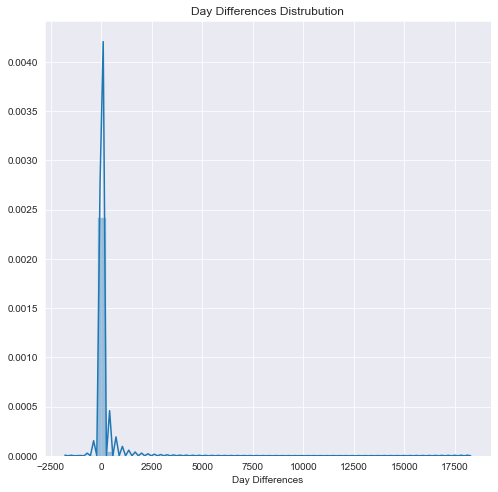

In [65]:
import seaborn as sns

plt.figure(figsize =(8,8))
sns.set_style('darkgrid')
sns.distplot(tsa['Day Differences'].dropna())
plt.title('Day Differences Distrubution')

Text(0.5, 1.0, 'Day Differences Distribution')

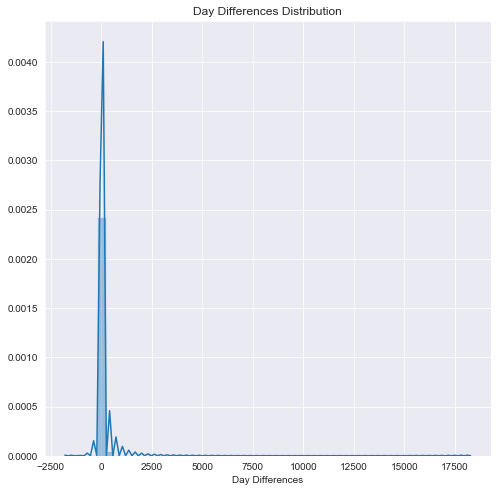

In [17]:
## Hasilnya 

If we seen it from the plot, it seems there is days that less than 0 and even over than 1000. Lets try to visualize them both

In [68]:
lessThan0 = tsa[tsa['Day Differences'] < 0]['Day Differences']
moreThan1000 = tsa[tsa['Day Differences'] > 1000]['Day Differences']

Text(0.5, 1.0, 'Day Differences Distribution Less than 0')

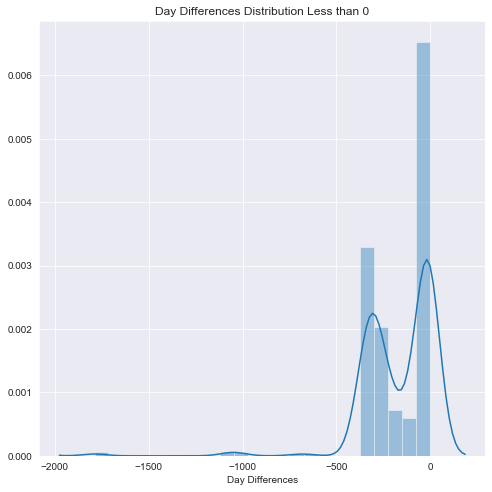

In [67]:
plt.figure(figsize=(8,8))
sns.distplot(lessThan0.dropna())
plt.title('Day Differences Distribution Less than 0')

Text(0.5, 1.0, 'Day Differences Distribution Less than 0')

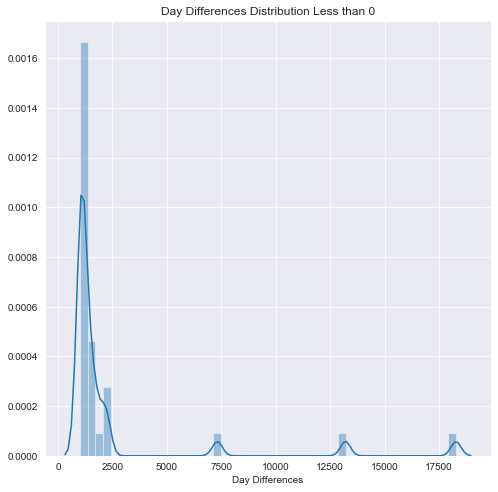

In [69]:
plt.figure(figsize=(8,8))
sns.distplot(moreThan1000.dropna())
plt.title('Day Differences Distribution Less than 0')

Text(0.5, 1.0, 'Day Differences Distribution less than 0')

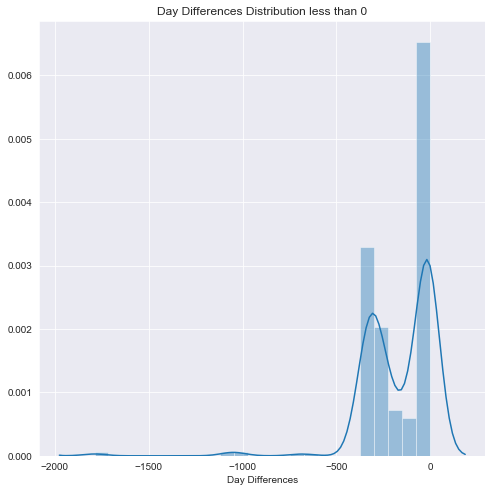

In [18]:
## Hasilnya

Text(0.5, 1.0, 'Day Differences Distribution over than 1000')

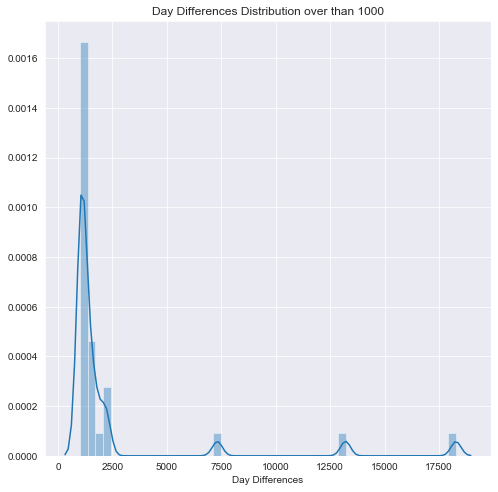

In [19]:
## Hasilnya

- Take action untuk Data less than 0 
    - Data yang kurang dari 0 (Make sense) -> drop out
    - Data yang kurang dari saya isi day differencesnya dengan 0 

## Question

Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

In [74]:
tsa['Day Differences'].values

array([-333.,    4.,   42., ...,   63.,   35.,    2.])

In [75]:
error_incident_time

[13729,
 14323,
 14856,
 14976,
 14995,
 15278,
 15934,
 16813,
 17198,
 19151,
 21528,
 22161,
 23232,
 24355,
 24525,
 24768,
 24903,
 25249,
 25705,
 25734,
 26129,
 26530,
 27086,
 27481,
 27628,
 27819,
 27901,
 28031,
 28037,
 29065,
 29652,
 31140,
 31570,
 31590,
 31771,
 33613]

In [76]:
check_error_data = []
for item in tsa[tsa['Day Differences'] < 0].index:
    if item in error_incident_time:
        check_error_data.append(item)

In [77]:
check_error_data

[13729, 22161, 24355, 24525, 24768, 29065]

In [78]:
len(tsa[tsa['Day Differences']<0])

448

In [79]:
len(tsa[tsa['Day Differences']>1000])

30

In [81]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Claim Number     51066 non-null  object        
 1   Date Received    50996 non-null  datetime64[ns]
 2   Incident Date    50496 non-null  datetime64[ns]
 3   Airport Code     48915 non-null  object        
 4   Airport Name     48915 non-null  object        
 5   Airline Name     41470 non-null  object        
 6   Claim Type       49035 non-null  object        
 7   Claim Site       50817 non-null  object        
 8   Item             48918 non-null  object        
 9   Claim Amount     46886 non-null  object        
 10  Status           47877 non-null  object        
 11  Close Amount     33786 non-null  object        
 12  Disposition      32846 non-null  object        
 13  Day Differences  50460 non-null  float64       
dtypes: datetime64[ns](2), float64(1), obje

Remove the $ sign (some data need even more clean up by replacing the ; sign into . sign) from the Claim Amount columns and Close Amount columns, and change those columns datatype into float datatype

In [84]:
x = tsa['Claim Amount'].loc[0]

In [88]:
x

'$50.00 '

In [86]:
import re

In [87]:
re.sub('[;]','',re.sub('[$]','',x))

TypeError: sub() missing 1 required positional argument: 'string'

In [89]:
re.sub('[$]','',x)

'50.00 '

Create a new columns called Amount Differences by substract the Claim Amount with Close Amount columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 15 columns):
Claim Number          51066 non-null object
Date Received         50996 non-null datetime64[ns]
Incident Date         50496 non-null datetime64[ns]
Airport Code          48915 non-null object
Airport Name          48915 non-null object
Airline Name          41470 non-null object
Claim Type            49035 non-null object
Claim Site            50817 non-null object
Item                  48918 non-null object
Claim Amount          46886 non-null float64
Status                47877 non-null object
Close Amount          33786 non-null float64
Disposition           32846 non-null object
Day Differences       50460 non-null float64
Amount Differences    33470 non-null float64
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 5.8+ MB


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22


Lets try to visualize it again similar to the Day Differences feature, but this time we would use the Amount Differences feature (still just drop the NaN first)

Text(0.5, 1.0, 'Amount Differences Distribution')

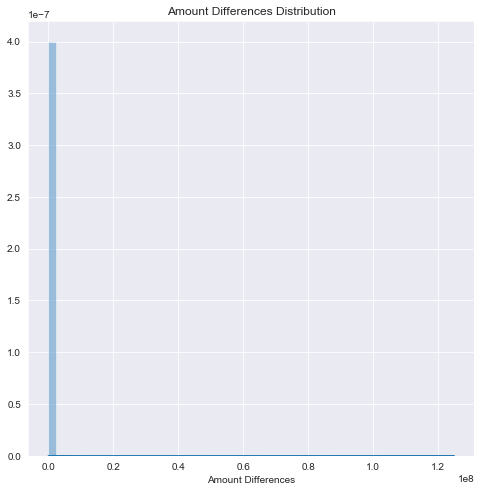

There is seems a differences in number that was way far. This time, lets use the Interquartile range (IQR) method to find the datapoint that seems to be an outlier based on the Amount Differences column, show the dataframe, and lets describe the Claim Amount and Close Amount column of the outlier dataframe based on the Amount Differences column

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
4,17846,2002-09-09,2002-08-30 00:00:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.00,NaN,10.0,1832.22
13,19133,2002-10-02,2002-08-22 00:00:00,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,2000.00,Denied,0.00,Deny,41.0,2000.00
21,18614,2002-10-17,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,33.0,1400.00
23,18356,2002-10-23,2002-09-18 00:00:00,LGA,LaGuardia,NaN,NaN,Checkpoint,Computer - Laptop,1801.99,Settled,291.67,Settle,35.0,1510.32
27,21817,2002-10-29,2002-10-05 00:00:00,MCO,Orlando International Airport,Delta Air Lines,NaN,Other,Other,7500.00,Denied,0.00,Deny,24.0,7500.00
55,19809,2002-11-13,2002-10-21 00:00:00,SMF,Sacramento International Airport,Southwest Airlines,NaN,Other,Computer - Laptop,3500.00,Denied,0.00,Deny,23.0,3500.00
60,21173,2002-11-14,2002-10-19 00:00:00,LAS,McCarran International,Southwest Airlines,NaN,Other,Other,1600.00,Denied,0.00,Deny,26.0,1600.00
87,18808,2002-11-20,2002-09-24 00:00:00,CLT,Charlotte/Douglas International Airport,USAir,NaN,Checkpoint,Cosmetics - Perfume; toilet articles; medicine...,3800.00,Settled,1416.41,Settle,57.0,2383.59
108,21015,2002-11-29,2002-11-13 00:00:00,LAS,McCarran International,Continental Airlines,NaN,Checkpoint,Eyeglasses - (including contact lenses),6111.59,Denied,0.00,Deny,16.0,6111.59
149,23124,2002-12-11,2002-11-03 00:00:00,CHS,Charleston International,USAir,Passenger Property Loss,Other,Jewelry - Fine,11500.00,Canceled,0.00,NaN,38.0,11500.00


count    4.103000e+03
mean     4.164579e+04
std      1.954354e+06
min      8.510100e+02
25%      1.214375e+03
50%      1.821750e+03
75%      3.000000e+03
max      1.250000e+08
Name: Claim Amount, dtype: float64

count     4103.000000
mean       114.613646
std        686.521806
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20000.000000
Name: Close Amount, dtype: float64

It seems that Claim Amount feature really affecting lot of the differences that happen as 75% outlier data that in the Close Amount feature is still 0.

## Question

I assume that many of this big differences happen because these people tend to request for bigger money than what it should be. Do you agree or disagree with my assumption (With an assumption that not outlier is have normal amount differences and outlier have a really big amount differences)? why? Try to explain it with the data 

## Analysis

We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

### Question

1. Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?

1. If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

## Bonus Question

Could you find any interesting Insight from our data that you could explain? Try to explain it with the available data